In [49]:
from sklearn.neural_network import MLPRegressor
import numpy as np
from sklearn import linear_model

length = 7530

f_leftandright = open('leftandright', 'rb')
left_lst = []
right_lst = []
pan_lst = []
tilt_lst = []

for i in range(length):
  left = f_leftandright.read(4)
  right = f_leftandright.read(4)
  pan = f_leftandright.read(4)
  tilt = f_leftandright.read(4)
  left_lst.append([int.from_bytes(left, byteorder = 'little' ,signed = True)])
  right_lst.append([int.from_bytes(right, byteorder = 'little' ,signed = True)])
  pan_lst.append([int.from_bytes(pan, byteorder = 'little' ,signed = True)])
  tilt_lst.append([int.from_bytes(tilt, byteorder = 'little' ,signed = True)])

f_offset = open('offset', 'rb')
panoff_lst = []
tiltoff_lst = []
rotateoff_lst = []
tranoff_lst = []

for i in range(length):
  panoff = f_offset.read(4)
  tiltoff = f_offset.read(4)
  rotateoff = f_offset.read(4)
  tranoff = f_offset.read(4)
  panoff_lst.append([int.from_bytes(panoff, byteorder = 'little' ,signed = True)])
  tiltoff_lst.append([int.from_bytes(tiltoff, byteorder = 'little' ,signed = True)])
  rotateoff_lst.append([int.from_bytes(rotateoff, byteorder = 'little' ,signed = True)])
  tranoff_lst.append([int.from_bytes(tranoff, byteorder = 'little' ,signed = True)])

rotatecom = []
translatecom = []
for i in range(length):
  rotatecom.append([(right_lst[i][0] - left_lst[i][0])/2])
  translatecom.append([(right_lst[i][0] + left_lst[i][0])/2])



f_error = open('error', 'rb')
pan_pid = []
tilt_pid = []
rotate_pid = []
tran_pid = []
for i in range(length):
  box = []
  m_integral = f_error.read(4)
  m_prevError = f_error.read(4)
  m_nowError = f_error.read(4)
  box.append(int.from_bytes(m_nowError, byteorder = 'little' ,signed = True))
  box.append(int.from_bytes(m_integral, byteorder = 'little' ,signed = True))
  box.append(int.from_bytes(m_nowError, byteorder = 'little' ,signed = True) - int.from_bytes( m_prevError, byteorder = 'little' ,signed = True))
  pan_pid.append(box)
  box = []
  m_integral = f_error.read(4)
  m_prevError = f_error.read(4)
  m_nowError = f_error.read(4)
  box.append(int.from_bytes(m_nowError, byteorder = 'little' ,signed = True))
  box.append(int.from_bytes(m_integral, byteorder = 'little' ,signed = True))
  box.append(int.from_bytes(m_nowError, byteorder = 'little' ,signed = True) - int.from_bytes( m_prevError, byteorder = 'little' ,signed = True))
  tilt_pid.append(box)
  box = []
  m_integral = f_error.read(4)
  m_prevError = f_error.read(4)
  m_nowError = f_error.read(4)
  box.append(int.from_bytes(m_nowError, byteorder = 'little' ,signed = True))
  box.append(int.from_bytes(m_integral, byteorder = 'little' ,signed = True))
  box.append(int.from_bytes(m_nowError, byteorder = 'little' ,signed = True) - int.from_bytes( m_prevError, byteorder = 'little' ,signed = True))
  rotate_pid.append(box)
  box = []
  m_integral = f_error.read(4)
  m_prevError = f_error.read(4)
  m_nowError = f_error.read(4)
  box.append(int.from_bytes(m_nowError, byteorder = 'little' ,signed = True))
  box.append(int.from_bytes(m_integral, byteorder = 'little' ,signed = True))
  box.append(int.from_bytes(m_nowError, byteorder = 'little' ,signed = True) - int.from_bytes( m_prevError, byteorder = 'little' ,signed = True))
  tran_pid.append(box)

f_error_pid = open('pantilt_pid', 'rb')
pan_lst = []
tilt_lst = []
for i in range(length):
  box = []
  pan_com = f_error_pid.read(4)
  box.append(int.from_bytes(pan_com, byteorder = 'little' ,signed = True))
  pan_lst.append(box)

  box = []
  tilt_com = f_error_pid.read(4)
  box.append(int.from_bytes(tilt_com, byteorder = 'little' ,signed = True))
  tilt_lst.append(box)


In [50]:
size = length
test_num = 1000 
datanum = 5
purpose_offset = panoff_lst
purpose_value = pan_lst
purpose_pid  = pan_pid

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler().fit(purpose_offset)
purpose_offset = scaler1.transform(purpose_offset)
scaler2 = MinMaxScaler().fit(purpose_value)
purpose_value = scaler2.transform(purpose_value)

In [52]:
print(len(purpose_offset[0]))

1


In [53]:
input_lst = []
for i in range(size - datanum + 1):
  box=[]
  for j in range(i, i+datanum, 1):
    box.append(purpose_offset[j][0])
  input_lst.append(box)


label_lst = []
for i in range(datanum - 1, size, 1):
  label_lst.append(purpose_value[i])


In [54]:
print(input_lst)

[[0.3212996389891697, 0.33935018050541516, 0.51985559566787, 0.33212996389891697, 0.4223826714801444], [0.33935018050541516, 0.51985559566787, 0.33212996389891697, 0.4223826714801444, 0.4729241877256318], [0.51985559566787, 0.33212996389891697, 0.4223826714801444, 0.4729241877256318, 0.4729241877256318], [0.33212996389891697, 0.4223826714801444, 0.4729241877256318, 0.4729241877256318, 0.5451263537906137], [0.4223826714801444, 0.4729241877256318, 0.4729241877256318, 0.5451263537906137, 0.5451263537906137], [0.4729241877256318, 0.4729241877256318, 0.5451263537906137, 0.5451263537906137, 0.5884476534296029], [0.4729241877256318, 0.5451263537906137, 0.5451263537906137, 0.5884476534296029, 0.5812274368231047], [0.5451263537906137, 0.5451263537906137, 0.5884476534296029, 0.5812274368231047, 0.51985559566787], [0.5451263537906137, 0.5884476534296029, 0.5812274368231047, 0.51985559566787, 0.4368231046931408], [0.5884476534296029, 0.5812274368231047, 0.51985559566787, 0.4368231046931408, 0.5631

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    input_lst, label_lst, test_size = 0.25, random_state=42)

In [56]:
print(len(X_train))
print(len(X_test))

5644
1882


In [57]:

# X = [[0., 0.], [1., 1.]]
# y = [0, 1]
clf = MLPRegressor(solver='adam', alpha=1e-5,batch_size=100,
                     hidden_layer_sizes=(10, 10), random_state=1)




In [58]:
clf.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=1e-05, batch_size=100, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [59]:
clf.predict(X_test)


array([0.54465769, 0.558461  , 0.56445491, ..., 0.59869173, 0.58193515,
       0.6111452 ])

In [60]:
[coef.shape for coef in clf.coefs_]

[(5, 10), (10, 10), (10, 1)]

R_square : [0.81911785]


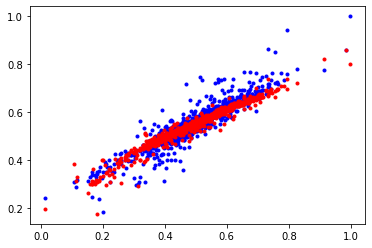

In [61]:
import matplotlib.pyplot as plt

y_hat = clf.predict(X_test)


SSE_lst = 0 
SST_lst = 0

sume = 0
for i in range(len(Y_test)):
  sume = sume + Y_test[i]

means = float(sume/len(Y_test))

for i in range(len(Y_test)):
  SSE_lst += (Y_test[i] - y_hat[i])**2
  SST_lst += (Y_test[i] - means)**2



R_square = 1 - (SSE_lst / SST_lst)

print("R_square :", R_square) 

input_encoded = []
for i in range(len(X_test)):
  input_encoded.append(X_test[i][datanum -1])

plt.plot(input_encoded, Y_test, '.', color = 'b') 
plt.plot(input_encoded, y_hat, '.', color = 'r') 

plt.show()

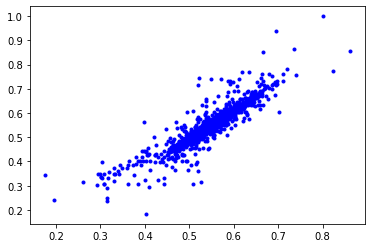

In [62]:
plt.plot(y_hat, Y_test, '.', color = 'b') 

plt.show()

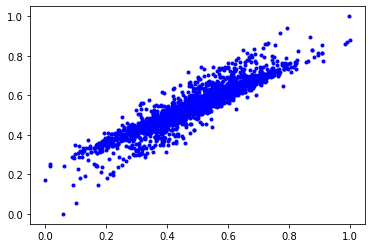

In [63]:
input_encoded = []
for i in range(len(input_lst)):
  input_encoded.append(input_lst[i][datanum -1])
y_hat_2 = clf.predict(input_lst)

plt.plot(input_encoded, label_lst, '.', color = 'b')
# plt.plot(input_encoded, y_hat_2, '.', color = 'r')
plt.show()